## Business Problem

#### The business is facing some challenges as customers’ behaviour have changed after the covid pandemic. The Marketing and Strategy teams are currently planning the next 12 months strategy and they need data led insights and recommendations to inform their decision. 

## Analysis

### Importing Libraries & Data

In [1]:
#importing the libraries for data analysis and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_excel('Customer Performance.xlsx')
df.head()

,month,region,new_or_existing,shoppers,GTV_usd,orders,items
0,2018-01,China,Existing,4232,6784779,9504,19727
1,2018-02,China,Existing,2645,3701376,4904,9758
2,2018-03,China,Existing,3041,4326538,6072,12412
3,2018-04,China,Existing,3002,4409912,6224,12903
4,2018-05,China,Existing,4373,7277904,11517,26691


In [3]:
# also let's find the few last data
df.tail()

,month,region,new_or_existing,shoppers,GTV_usd,orders,items
495,2021-10,US,New,16599,9325796,19612,26530
496,2021-11,US,New,23237,12992407,27266,39189
497,2021-12,US,New,26664,13356272,31609,42109
498,2022-01,US,New,16265,8436054,19130,25513
499,2022-02,US,New,13746,7275732,16169,21288


In [4]:
#now let's see the data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            500 non-null    object
 1   region           500 non-null    object
 2   new_or_existing  500 non-null    object
 3   shoppers         500 non-null    int64 
 4   GTV_usd          500 non-null    int64 
 5   orders           500 non-null    int64 
 6   items            500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [5]:
#let's see if is there any null values
df.isna().sum()

month              0
region             0
new_or_existing    0
shoppers           0
GTV_usd            0
orders             0
items              0
dtype: int64

##### The data is clean and data type is ok too. So I can proceed for the analysis part now

### Exploratory Data Analysis

#####  Since the data is from 2018, it means we have information about before and after covid. I'm going to observe the gross total values, orders and items per year. That will help a lot.

In [6]:
# first i'll extract the year & month from the date by converting it in datetime
df['date'] = pd.to_datetime(df['month'])  # Convert the column to datetime type
df['year'] = df['date'].dt.year  # Extract the year into a new column
df['Month'] = df['date'].dt.month  # Extract the year into a new column

In [7]:
# drop the column 'month'
df = df.drop('month',axis=1)

In [8]:
# Now, let's find out the total number of shopers per year
total_shopers_all = df.groupby('year')['shoppers'].sum().reset_index()
total_shopers_all.rename(columns={'shoppers':'total_shoppers'}, inplace=True) #renaming the column after agrregation
total_shopers_all

,year,total_shoppers
0,2018,541809
1,2019,757355
2,2020,1208977
3,2021,1540845
4,2022,224024


##### The above results show that during the peak of the pandemic which is 2020 & 2021, no. of shoppers increased in large numbers. However, I would like to see how many of them are new or existing customers.

In [9]:
# let's find out the total number of shopers per year and type of customers
TotalShopers = df.groupby(['year','new_or_existing'])['shoppers'].sum().reset_index()
TotalShopers.rename(columns={'shoppers':'total_shoppers'}, inplace=True) #renaming the column after agrregation
TotalShopers

,year,new_or_existing,total_shoppers
0,2018,Existing,304056
1,2018,New,237753
2,2019,Existing,449578
3,2019,New,307777
4,2020,Existing,643028
5,2020,New,565949
6,2021,Existing,902766
7,2021,New,638079
8,2022,Existing,139457
9,2022,New,84567


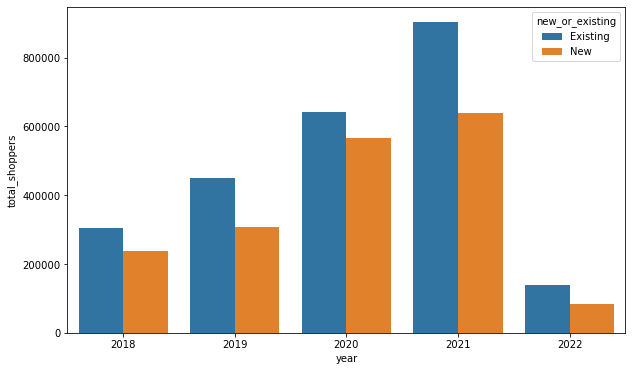

In [10]:
# to understand the above result, I used bar chart.
plt.figure(figsize=(10,6))

sns.barplot(data=TotalShopers, x='year', y='total_shoppers', hue='new_or_existing')

# Set labels and title
plt.xlabel('year')
plt.ylabel('total_shoppers')

# Display the plot
plt.show()

##### The above chart is showing in 2020 & 2021, new customers joined in large numbers. In this case, we have to ignore the year 2022 because of the lack of data. However, it is still showing some good numbers in a shorter period (which is 2 months of data).

In [11]:
# let's find out the total number of shopers per year and type of customers
TotalOrders = df.groupby(['year','new_or_existing'])['orders'].sum().reset_index()
TotalOrders.rename(columns={'orders':'total_orders'}, inplace=True) #renaming the column after agrregation

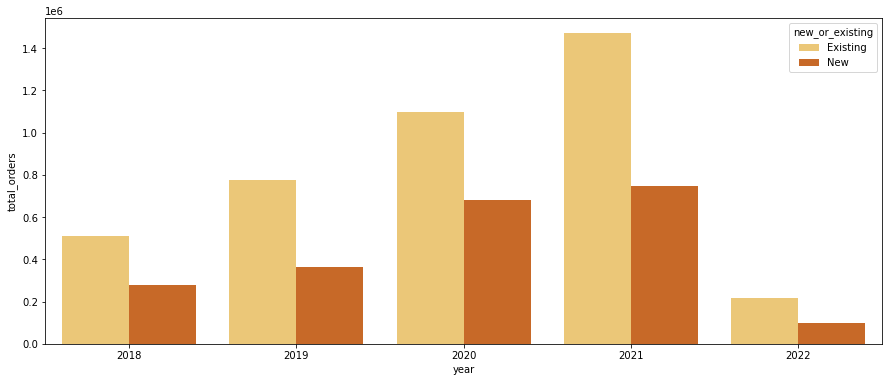

In [12]:
#showing the total orders generated each kind of customers
plt.figure(figsize=(15,6))

sns.barplot(data=TotalOrders, x='year', y='total_orders', palette='YlOrBr', hue='new_or_existing')

# Set labels and title
plt.xlabel('year')
plt.ylabel('total_orders')

# Display the plot
plt.show()

##### Here, we can notice that every year the number of orders is increasing at a decent rate. And behind that a large part of new customers are responsible. During 2020 and 2021, the number of orders from new customers was higher than ever before. In the year 2021 which is considered as after the pandemic, the total orders were in a large numbers.

In [13]:
# let's see how is the revenue throughout the time period.
Revenue = df.groupby(['date','new_or_existing'])['GTV_usd'].sum().reset_index()
Revenue.rename(columns={'GTV_usd':'total_rev'}, inplace=True) #renaming the column after agrregation
Revenue

,date,new_or_existing,total_rev
0,2018-01-01,Existing,24445619
1,2018-01-01,New,9488212
2,2018-02-01,Existing,16691811
3,2018-02-01,New,7495450
4,2018-03-01,Existing,18515638
...,...,...,...
95,2021-12-01,New,33888748
96,2022-01-01,Existing,69948543
97,2022-01-01,New,22372625
98,2022-02-01,Existing,59857959


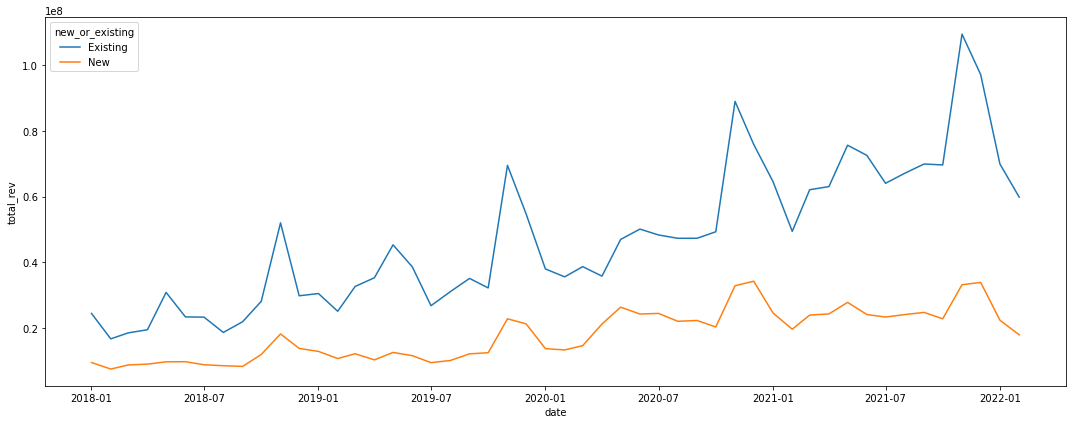

In [14]:
# Revenue at different point of time for both new and existing customers
plt.figure(figsize=(15,6))

sns.lineplot(data=Revenue, x='date', y='total_rev', hue='new_or_existing')

# Set labels and title
plt.xlabel('date')
plt.ylabel('total_rev')

# Display the plot
plt.tight_layout()
plt.show()

##### For the revenue the trend is positive. However, there are some phases in every year where the revenue is higher and suddenly drops. I would look for the orders and total items as well in respective years and months to compare.

<Figure size 1080x432 with 0 Axes>

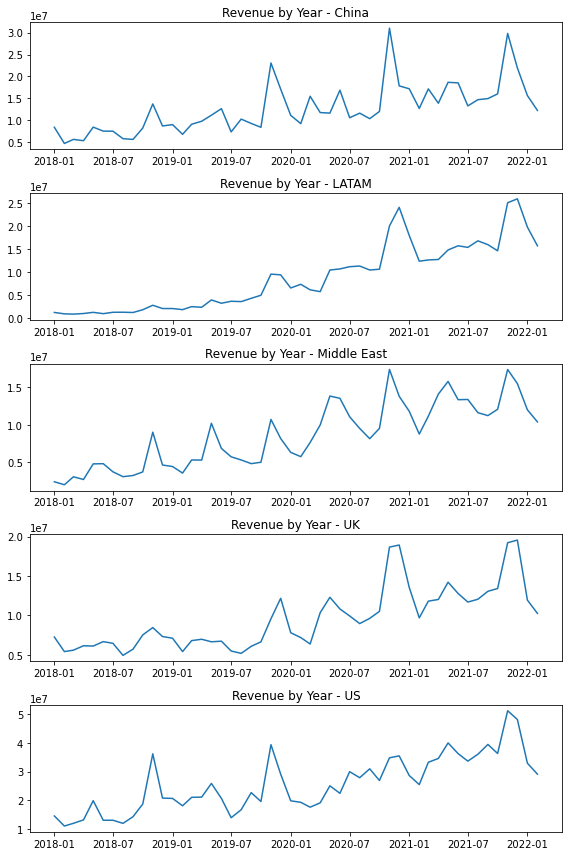

In [15]:
# let's see how is the revenue throughout the time period for each region.
Revenue_by_region = df.groupby(['date','region'])['GTV_usd'].sum().reset_index()
Revenue_by_region.rename(columns={'GTV_usd':'total_rev'}, inplace=True) #renaming the column after agrregation


plt.figure(figsize=(15,6))

# Get the unique regions
regions = Revenue_by_region['region'].unique()

# Create a 5-subplot grid
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

# Loop over the regions and create a plot for each
for i, region in enumerate(regions):
    ax = axes[i]  # Access the current subplot
    
    # Filter the data for the current region
    region_data = Revenue_by_region[Revenue_by_region['region'] == region]
    
    # Plot the revenue by year
    ax.plot(region_data['date'], region_data['total_rev'])
    
    # Set the title for the subplot
    ax.set_title(f"Revenue by Year - {region}")
    
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

##### Even in the case of different regions, there is some seasonality which can be noticed in the rise and fall at different points of time.

In [16]:
# Group the Data by year and calculate the sum of each variable
grouped_df = df.groupby(['year','region']).agg({'shoppers':'sum','GTV_usd':'sum','orders': 'sum', 'items': 'sum'}).reset_index()
grouped_df.rename(columns={'shoppers':'total_shoppers','GTV_usd':'tot_rev','orders':'total_orders', 'items':'total_items'}, inplace=True)
sorted_data = grouped_df.sort_values(by=['year','tot_rev'], ascending=[True,False])

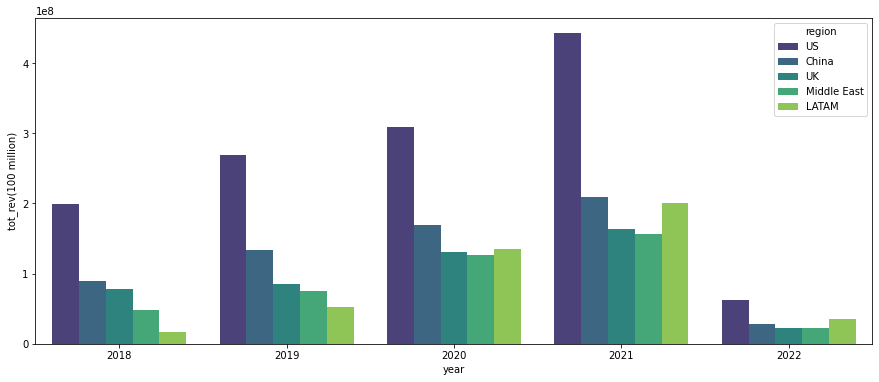

In [17]:
#showing the distribution of revenue in each year by every region
plt.figure(figsize=(15,6))

sns.barplot(data=sorted_data, x='year', y='tot_rev', palette='viridis', hue='region')

# Set labels and title
plt.xlabel('year')
plt.ylabel('tot_rev(100 million)')

# Display the plot
plt.show()

##### In the above chart, we can notice that the US is the leading revenue generator region and after that it is China. However, the most interesting takeaway is that LATAM was in the last position before the pandemic. But from the year 2020, its performance is improving, and even at the start of 2022, it surpassed China in total revenue generation. The UK and the Middle East are performing well constantly.

In [18]:
# let's find out which region gained more number of new cutomers.
new_customers = df[df['new_or_existing']=='New'].groupby(['year','region'])['shoppers'].sum().reset_index()
new_customers.rename(columns={'shoppers':'total_new_customers'}, inplace=True)
sort_data = new_customers.sort_values(by='total_new_customers', ascending=True)

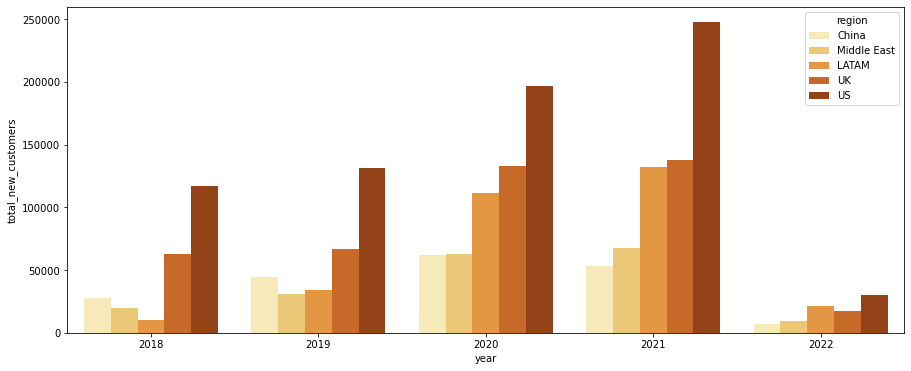

In [19]:
#showing the distribution of new customers in each year by every region
plt.figure(figsize=(15,6))

sns.barplot(data=sort_data, x='year', y='total_new_customers', palette='YlOrBr', hue='region')

# Set labels and title
plt.xlabel('year')
plt.ylabel('total_new_customers')

# Display the plot
plt.show()

##### Here the story is a little different. As we noticed earlier China was at the second position in revenue generation except for 2022. But If we talk about new customers, the UK is in the second position except in 2022. And LATAM has rapidly incremented in new customers throughout the years.

In [20]:
# YoY change in revenue and customer acquisition
grouped_df['YOY Change'] = grouped_df.groupby('region')['tot_rev'].pct_change() * 100
new_customers['YOY_Change_cust'] = new_customers.groupby('region')['total_new_customers'].pct_change() * 100

# Round the YOY change values to two decimal points
grouped_df['YOY Change'] = grouped_df['YOY Change'].round(2)
new_customers['YOY_Change_cust'] = new_customers['YOY_Change_cust'].round(2)

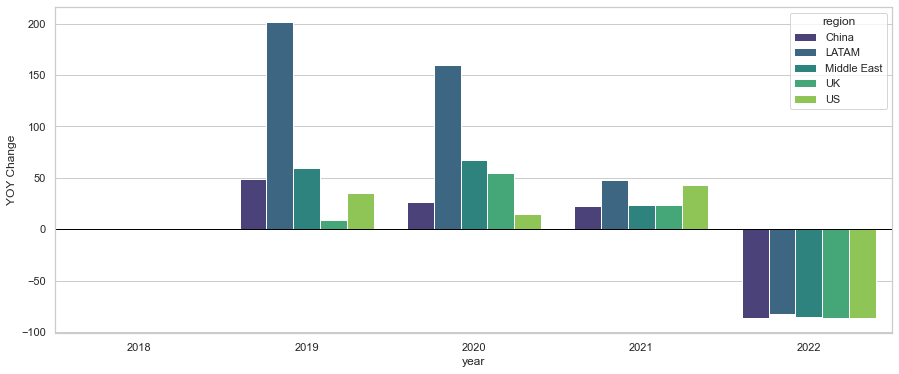

In [21]:
#showing the year of year change of revenue in each year by every region
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(data=grouped_df, x='year', y='YOY Change', palette='viridis', hue='region')

# Add the axis lines
ax.axhline(0, color='black', linewidth=1)

# Show the plot
plt.show()

##### If we carefully observe the YOY change in revenue then we can notice that LATAM has the highest positive change among all the countries. UK & Middle East has an increasing rate of percentage in 2019 & 2020. However, in 2021 only US has an increasing rate of change.

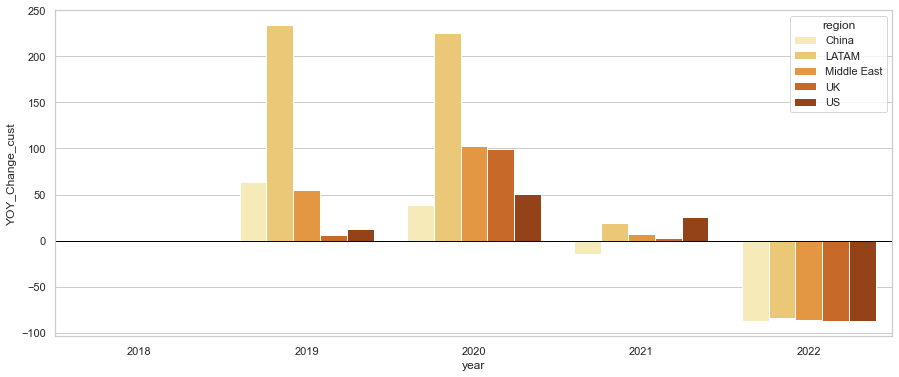

In [22]:
#showing the year of year change of getting new customers by every region
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(data=new_customers, x='year', y='YOY_Change_cust', palette='YlOrBr', hue='region')

# Add the axis lines
ax.axhline(0, color='black', linewidth=1)

# Show the plot
plt.show()

##### Above we can notice that till year 2020 LATAM has the highest percentage change in getting new customers. But in the year 2021 which is considered as after the pandemic, China will have a negative change in new customers. The Middle East, the UK, and the US are performing well in this scenario.

### Insights & Recommendations

#### Insights:

1) The first thing that I noticed is that the total revenue every year is gradually increasing. This gave a positive image of the company initially.

2) However, when I plotted the revenue according to the period I noticed an interesting thing. There is a sudden increase in revenue after every 5-6 months.

3) In the case of the Middle East, I noticed some kind of seasonality. In other regions, there is some seasonality but they are not like the Middle East. However, it is necessary to find out the reasons behind that.

4) The US is the leading region in terms of highest revenue and LATAM is the most emerging region which has been improved in terms of revenue.

5) LATAM has the most effective YoY change in total revenue every year. However, after the pandemic, the rate of change is quite lower.

6) LATAM has a high percentage change in the case of new customers. The UK and the US are the 2 regions where the number of new customers increased well during the pandemic. And China is the worst-performing region.

#### Recommendations

Here are some key performance indicators (KPIs) and suggestions for the upcoming 12 months based on the analysis's key learnings:

1) Track the overall pace of revenue growth on a monthly or quarterly basis. This will make it easier to track the company's financial performance and spot any trends or variations.

2) Track how quickly you are bringing in new clients, especially in markets like LATAM, the UK, and the US. This indicator will show whether marketing and sales efforts were successful in growing the customer base.

3) Examine the seasonality in the Middle East and the variables influencing it. Seasonal Revenue Patterns. Understanding consumer behavior will make it easier to create targeted marketing initiatives during busy times.

4) Calculate the proportion of clients who are kept during a predetermined time period, such as a quarter or a year. To boost client retention rates, concentrate on enhancing customer pleasure, loyalty programs, and personalized experiences.

5) Increasing market penetration and income generation in the Chinese market requires the development of strategies. In order to draw and keep clients in this area, identify any obstacles or difficulties and develop marketing and localization strategies.

6) Following a pandemic, track the rate of revenue recovery and client acquisition. To react to shifting market conditions and consumer tastes, revise operational procedures and marketing strategies.

7) Conduct routine competition analysis to comprehend the market environment, spot new trends, and keep a step ahead of rival businesses. The creation of distinctive value propositions and tailored marketing strategies will benefit from this.

8) Establish an effective customer feedback method to learn more about the preferences, problem spots, and levels of customer satisfaction. Utilize this input to inform changes to product selection, customer support, and the overall customer experience.

9) Investigate possible markets or geographic areas for expansion based on revenue growth, customer growth, and market potential analysis. To determine feasibility and potential ROI, develop market entrance strategies, and carry out market research.